In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, poisson
from ipywidgets import interact

def plot_distributions(a):
    # Gaussian distribution
    data=10
    mc=11
    err=2
    x_gaussian = np.linspace(-10, 10, 1000)
    gaussian = norm.pdf(x_gaussian, loc=0, scale=np.sqrt(a))

    # Poisson distribution
    x_poisson = np.arange(0, 20, 1)
    poissonian = poisson.pmf(x_poisson, mu=a)

    # Multiplication of Gaussian and Poissonian
    # Aligning the Poissonian to the Gaussian's scale for multiplication
    poissonian_aligned = np.interp(x_gaussian, x_poisson, poissonian)
    combined = gaussian * poissonian_aligned

    # Plotting
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    axes[0].plot(x_gaussian, gaussian)
    axes[0].set_title("Gaussian Distribution")
    axes[0].set_xlabel("x")
    axes[0].set_ylabel("Probability Density")

    axes[1].stem(x_poisson, poissonian, basefmt=" ")
    axes[1].set_title("Poissonian Distribution")
    axes[1].set_xlabel("x")
    axes[1].set_ylabel("Probability Mass")

    axes[2].plot(x_gaussian, combined)
    axes[2].set_title("Multiplication of Gaussian and Poissonian")
    axes[2].set_xlabel("x")
    axes[2].set_ylabel("Combined Probability")

    plt.tight_layout()
    plt.show()

# Creating an interactive plot
interact(plot_distributions, a=(0.1, 10.0, 0.1))


interactive(children=(FloatSlider(value=5.0, description='a', max=10.0, min=0.1), Output()), _dom_classes=('wi…

<function __main__.plot_distributions(a)>

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, poisson
from ipywidgets import interact

# Define the Gaussian function
def gaussian(x, mean=0, std=1):
    return norm.pdf(x, mean, std)

# Generate data for the Gaussian
x = np.linspace(-5, 5, 1000)
y = gaussian(x)

# Define a function to plot with a point on the Gaussian
def plot_gaussian(slider_value):
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='Gaussian Distribution')
    plt.scatter([slider_value], [gaussian(slider_value)], color='red')  # Point on the Gaussian
    plt.title(f'Gaussian Distribution with a point at x={slider_value}')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.show()

# Create a slider to interact with the plot
interact(plot_gaussian, slider_value=(-5, 5, 0.1))


# Define the Poisson distribution function
def poisson_distribution(k, lam=5):
    return poisson.pmf(k, lam)

# Generate data for the Poisson distribution
k_values = np.arange(0, 20)
y_values = poisson_distribution(k_values)

# Define a function to plot with a point on the Poisson distribution
def plot_poisson(slider_value):
    plt.figure(figsize=(10, 6))
    plt.bar(k_values, y_values, label='Poisson Distribution', alpha=0.7)
    plt.scatter([slider_value], [poisson_distribution(slider_value)], color='red')  # Point on the distribution
    plt.title(f'Poisson Distribution with a point at k={slider_value}')
    plt.xlabel('k (number of events)')
    plt.ylabel('Probability')
    plt.xticks(k_values)
    plt.legend()
    plt.show()

# Create a slider to interact with the plot
interact(plot_poisson, slider_value=(0, 19, 1))


interactive(children=(FloatSlider(value=0.0, description='slider_value', max=5.0, min=-5.0), Output()), _dom_c…

interactive(children=(IntSlider(value=9, description='slider_value', max=19), Output()), _dom_classes=('widget…

<function __main__.plot_poisson(slider_value)>

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, poisson
from ipywidgets import interact, IntSlider

# Define the Gaussian function
def gaussian(x, mean=0, std=1):
    return norm.pdf(x, mean, std)

# Define the Poisson distribution function
def poisson_distribution(k, lam=5):
    return poisson.pmf(k, lam)

# Generate data for the Gaussian and Poisson distributions
x = np.linspace(-5, 5, 1000)
y_gaussian = gaussian(x)
k_values = np.linspace(0, 20, 1000)
y_poisson = poisson_distribution(k_values)

# Define a function to plot both distributions with their multiplication result
def plot_distributions(slider_value):
    plt.figure(figsize=(12, 6))

    # Gaussian plot
    plt.subplot(1, 2, 1)
    plt.plot(x, y_gaussian, label='Gaussian Distribution')
    gaussian_point = gaussian(slider_value)
    plt.scatter([slider_value], [gaussian_point], color='red')  # Point on Gaussian
    plt.title('Gaussian Distribution')
    plt.xlabel('x')
    plt.ylabel('Probability Density')

    # Poisson plot
    plt.subplot(1, 2, 2)
    plt.bar(k_values, y_poisson, label='Poisson Distribution', alpha=0.7)
    poisson_point = poisson_distribution(slider_value)
    plt.scatter([slider_value], [poisson_point], color='red')  # Point on Poisson
    plt.title('Poisson Distribution')
    plt.xlabel('k (number of events)')
    plt.ylabel('Probability')
    plt.xticks(k_values)

    # Display result of multiplication
    multiplication_result = gaussian_point * poisson_point
    plt.suptitle(f'Multiplication Result: {multiplication_result:.5f}')

    plt.tight_layout()
    plt.show()

# Create a single slider to interact with both plots
interact(plot_distributions, slider_value=FloatSlider(value=5, min=-5, max=1, step=1))


interactive(children=(FloatSlider(value=5.0, description='slider_value', max=19.0, step=1.0), Output()), _dom_…

<function __main__.plot_distributions(slider_value)>

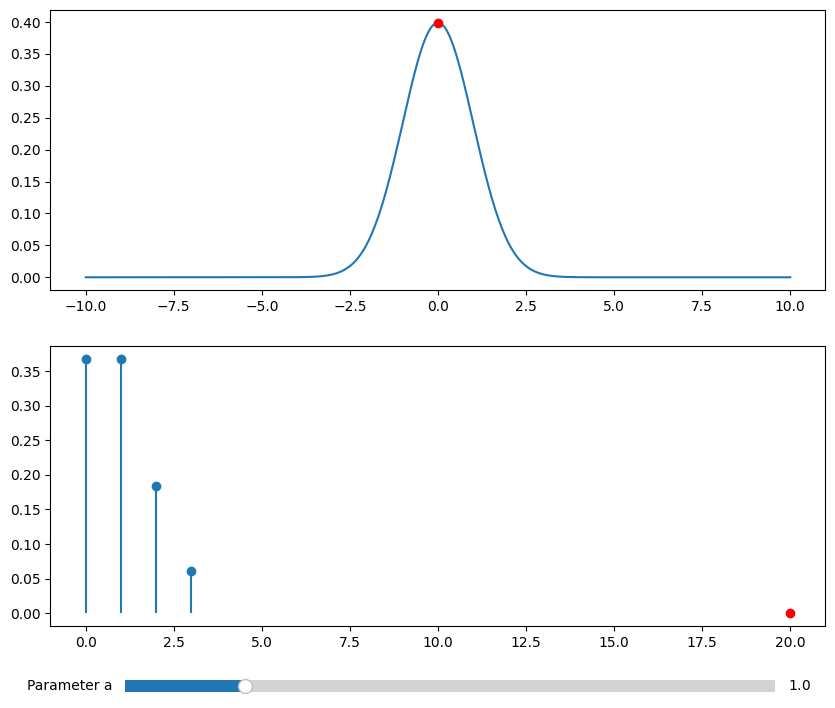

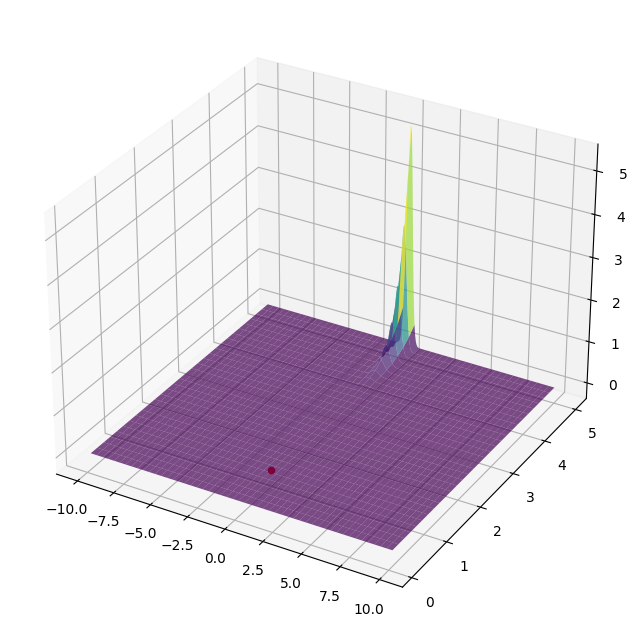

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, poisson
from matplotlib.widgets import Slider
from mpl_toolkits.mplot3d import Axes3D

# Define the Gaussian and Poissonian functions
def gaussian(x, a):
    return norm.pdf(x, loc=0, scale=1/a)

def poissonian(k, lam):
    return poisson.pmf(k, lam)

def Z(a, x, k=20):
    return gaussian(x, a) * poissonian(k, a)

# Initial parameter a
a0 = 1

# Gaussian plot
x = np.linspace(-10, 10, 400)
fig, axs = plt.subplots(2, figsize=(10, 8))
axs[0].plot(x, gaussian(x, a0), label='Gaussian')
gaussian_dot, = axs[0].plot([0], gaussian(0, a0), 'ro')

# Poissonian plot
k = 20
lam = a0
poisson_x = np.arange(poisson.ppf(0.01, lam), poisson.ppf(0.99, lam))
axs[1].stem(poisson_x, poissonian(poisson_x, lam), label='Poissonian', basefmt=" ")
poissonian_dot, = axs[1].plot([k], poissonian(k, lam), 'ro')

# Slider for parameter 'a'
axcolor = 'lightgoldenrodyellow'
ax_a = plt.axes([0.2, 0.02, 0.65, 0.03], facecolor=axcolor)
slider_a = Slider(ax_a, 'Parameter a', 0.1, 5.0, valinit=a0)

# Update function for the slider
def update(val):
    a = slider_a.val
    gaussian_dot.set_ydata(gaussian(0, a))
    poissonian_dot.set_ydata(poissonian(k, a))
    axs[0].set_ylim(0, max(gaussian(x, a)) + 0.05)
    axs[1].set_ylim(0, max(poissonian(poisson_x, a)) + 0.05)
    fig.canvas.draw_idle()

slider_a.on_changed(update)

# 3D plot for Z
fig_3d = plt.figure(figsize=(10, 8))
ax_3d = fig_3d.add_subplot(111, projection='3d')
X, A = np.meshgrid(x, np.linspace(0.1, 5, 30))
Z_vals = Z(A, X)
ax_3d.plot_surface(X, A, Z_vals, cmap='viridis', alpha=0.7)
Z_dot = ax_3d.scatter([0], [a0], [Z(a0, 0)], color='r')

def update_3d(val):
    a = slider_a.val
    Z_dot._offsets3d = ([0], [a], [Z(a, 0)])
    fig_3d.canvas.draw_idle()

slider_a.on_changed(update_3d)

plt.show()

